Title: Blood Cell Classification using Convolutional Neural Networks (Image processing and analysis) ML Model


Objective:
Develop a Machin learning Model with help of Convolutional Neural Network (CNN) model which would be capable of accurately classifying different types of blood cells based on images(EOSINOPHIL, LYMPHOCYTE, MONOCYTE, NEUTROPHIL) using Convolutional Neural Networks (CNNs). 


Dataset has the images of blood cells.

1. Data Collection and Preprocessing:
Downloaded the image data set from the keggle of blood cells (EOSINOPHIL, LYMPHOCYTE, MONOCYTE, NEUTROPHIL).
Preprocess the images to ensure uniform size, resolution and quality which includes the technics for resizing and normalization.

2. Model Training and Evaluation:
Split the dataset into training 80% and testing 20% sets ensuring that each class.
Train the CNN model on the training data. Since the data is in form of images ML model tool more than 4 hours time to process the accurate data.

Evaluate the trained model on the testing data.

3. Calculated the accuracy percentage.

Resources Required:
Python Libraries: Pandas, NumPy, Matplotlib, scikit-learn, TensorFlow, Keras
Dataset: https://www.kaggle.com/datasets/paultimothymooney/blood-cells

Imported required library for analysis

In [1]:
import pandas as pd #load the file paths and corresponding labels into a DataFrame
import numpy as np #Data preprocessing, image manipulation on the data
import os # Joining directory paths with file names for creating file paths
import keras #Creating the Convolutional neural network (CNN) and to train the model on the image data
import tensorflow as tf #provide support for CNN model
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
import matplotlib as mat #Plotting and visualizing data
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split

Define location of directories where the images are stored

In [2]:
#Identify the directory of images / Importing the files in the computer
#EO is EOSINOPHIL BLOOD DISEASES
#LY is LYMPHOCYTE BLOOD DISEASES
#MO is MONOCYTE BLOOD DISEASES
#NE is NEUTROPHI BLOOD DISEASES

EO_dir = [ r'C:\Users\Daxesh Patel\Desktop\BISI\SEM-1\BI Programming\Project\Project-2\Dataset\TRAIN\EOSINOPHIL']

LY_dir = [ r'C:\Users\Daxesh Patel\Desktop\BISI\SEM-1\BI Programming\Project\Project-2\Dataset\TRAIN\LYMPHOCYTE']

MO_dir = [r'C:\Users\Daxesh Patel\Desktop\BISI\SEM-1\BI Programming\Project\Project-2\Dataset\TRAIN\MONOCYTE']

NE_dir = [r'C:\Users\Daxesh Patel\Desktop\BISI\SEM-1\BI Programming\Project\Project-2\Dataset\TRAIN\NEUTROPHIL']


Adding directories to the proper location and taking the labels for further analysis

In [3]:
file = []  #store file paths for analysis
label = [] #Corresponding labels for analysis and ease of understanding

dict_lists = [EO_dir, LY_dir, MO_dir, NE_dir] # List containing directories for different classes of blood cells
class_labels = ['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL'] #Classes of blood cells

for i, lists in enumerate(dict_lists): #Using for loop for additing the path and class #took reference of github project
    for j in lists:
        flist = os.listdir(j)
        for f in flist:
            path1 = os.path.join(j, f) #Constructs the file path with joining the directory path with the file name
            
            file.append(path1) #Adding the path in file
            label.append(class_labels[i]) #Assigning class lables

File_series = pd.Series(file, name="file")
Lable_series = pd.Series(label, name="label")
data = pd.concat([File_series, Lable_series], axis=1)
df = pd.DataFrame(data)

Print the Data head and labels for getting the preliminary understanding of the data 

In [4]:
print(df.head()) #Print Data head
print(df["label"].value_counts()) #prin the data labels 
print(df.describe())
df.shape

                                                file       label
0  C:\Users\Daxesh Patel\Desktop\BISI\SEM-1\BI Pr...  EOSINOPHIL
1  C:\Users\Daxesh Patel\Desktop\BISI\SEM-1\BI Pr...  EOSINOPHIL
2  C:\Users\Daxesh Patel\Desktop\BISI\SEM-1\BI Pr...  EOSINOPHIL
3  C:\Users\Daxesh Patel\Desktop\BISI\SEM-1\BI Pr...  EOSINOPHIL
4  C:\Users\Daxesh Patel\Desktop\BISI\SEM-1\BI Pr...  EOSINOPHIL
label
NEUTROPHIL    2499
EOSINOPHIL    2497
LYMPHOCYTE    2483
MONOCYTE      2478
Name: count, dtype: int64
                                                     file       label
count                                                9957        9957
unique                                               9957           4
top     C:\Users\Daxesh Patel\Desktop\BISI\SEM-1\BI Pr...  NEUTROPHIL
freq                                                    1        2499


(9957, 2)

Splitting the data in to training and testing (80% data will be used for training and 20% for testing)

In [5]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=4) #Random_state is considered for getting the same result everytime

In [6]:
print("Size of the Training Data:", train_df.shape) #Share of training data
print("Size of the Testing Data:", test_df.shape) #Share of test data

Size of the Training Data: (7965, 2)
Size of the Testing Data: (1992, 2)


For getting the faster convergence and better performance of CNN method, it is mandatory to do normalization. Hence in following steps generate batches of normalized data from image data.

In [7]:
IMG = ImageDataGenerator(preprocessing_function= tf.keras.applications.mobilenet_v2.preprocess_input) #reference keggle

In [8]:
train = IMG.flow_from_dataframe(dataframe=train_df, x_col="file", y_col="label", # Conver the (train) image size  to same dimension for ease of normalization
                                target_size=(150, 150), #Specifies the size of the image
                                color_mode='rgb', #Image type
                                class_mode="categorical",
                                batch_size=10,
                                shuffle=False) #Shuffle is not allowed

test = IMG.flow_from_dataframe(dataframe=test_df, x_col="file", y_col="label", # Conver the (test) image size  to same dimension for ease of normalization
                               target_size=(150, 150), #Specifies the size of the image
                               color_mode='rgb', #Image type
                               class_mode="categorical",
                               batch_size=10,
                               shuffle=False) #Shuffle is not allowed

Found 7965 validated image filenames belonging to 4 classes.
Found 1992 validated image filenames belonging to 4 classes.


Show the Data / Image

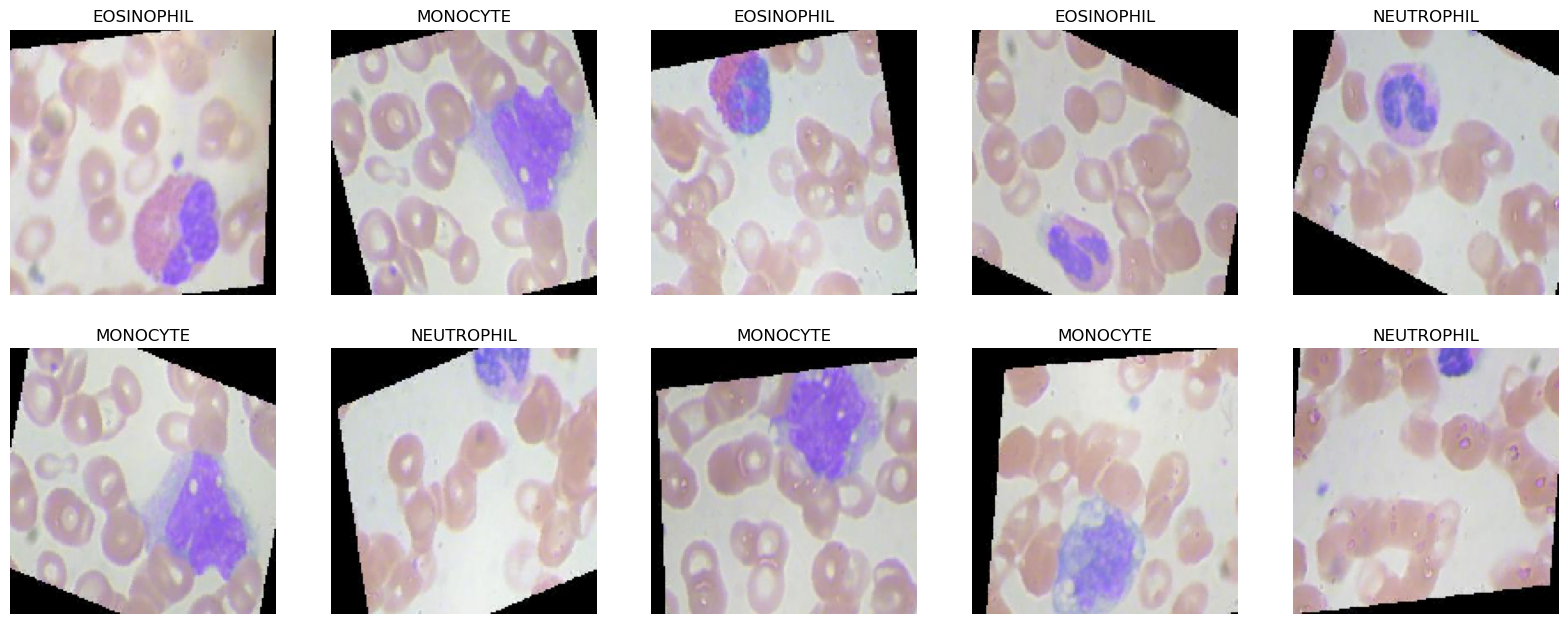

In [9]:
def show_IMG(image_gen):  #Code reference from Github as it has std code.
    test_dict = test.class_indices
    classes = list(test_dict.keys())
    images, labels=next(image_gen) # get a sample batch from the generator
    plt.figure(figsize=(20,20))
    length = len(labels)
    if length<25:
        r=length
    else:
        r=25
    for i in range(r):
        plt.subplot(5,5,i+1)
        image=(images[i]+1)/2 #scale images between 0 and 1
        plt.imshow(image)
        index=np.argmax(labels[i])
        class_name=classes[index]
        
        plt.title(class_name, color="black",fontsize=12) #Title details
        
        plt.axis('off')
    plt.show()
show_IMG(train)

Normal lization from Keras as needed for convolutional neural network (CNN)

In [10]:
model = keras.models.Sequential([                  #took help of github for understanding the preparing the code                           
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    keras.layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4, activation='softmax')
])


model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.optimizers.SGD(learning_rate=0.001),
    metrics=['accuracy']
)

model.summary()

C:\Users\Daxesh Patel\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,398,596 (54.93 MB)

 Trainable params: 14,398,596 (54.93 MB)

 Non-trainable params: 0 (0.00 B)

CNN machin learning model run for training

In [11]:
history = model.fit(train, epochs=40, verbose=1)

Epoch 1/40


C:\Users\Daxesh Patel\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


797/797 ━━━━━━━━━━━━━━━━━━━━ 351s 439ms/step - accuracy: 0.2427 - loss: 1.3896
Epoch 2/40
797/797 ━━━━━━━━━━━━━━━━━━━━ 332s 416ms/step - accuracy: 0.2601 - loss: 1.3857
Epoch 3/40
797/797 ━━━━━━━━━━━━━━━━━━━━ 333s 417ms/step - accuracy: 0.2690 - loss: 1.3837
Epoch 4/40
797/797 ━━━━━━━━━━━━━━━━━━━━ 321s 402ms/step - accuracy: 0.2753 - loss: 1.3829
Epoch 5/40
797/797 ━━━━━━━━━━━━━━━━━━━━ 325s 406ms/step - accuracy: 0.2922 - loss: 1.3798
Epoch 6/40
797/797 ━━━━━━━━━━━━━━━━━━━━ 323s 406ms/step - accuracy: 0.3145 - loss: 1.3759
Epoch 7/40
797/797 ━━━━━━━━━━━━━━━━━━━━ 1601s 2s/step - accuracy: 0.3190 - loss: 1.3727
Epoch 8/40
797/797 ━━━━━━━━━━━━━━━━━━━━ 322s 404ms/step - accuracy: 0.3300 - loss: 1.3676
Epoch 9/40
797/797 ━━━━━━━━━━━━━━━━━━━━ 328s 411ms/step - accuracy: 0.3495 - loss: 1.3545
Epoch 10/40
797/797 ━━━━━━━━━━━━━━━━━━━━ 329s 413ms/step - accuracy: 0.3637 - loss: 1.3361
Epoch 11/40
797/797 ━━━━━━━━━━━━━━━━━━━━ 330s 414ms/step - accuracy: 0.3672 - loss: 1.3160
Epoch 12/40
797/797 ━

CNN machin learning model run for testing

In [12]:
model.evaluate(test, verbose=1)

200/200 ━━━━━━━━━━━━━━━━━━━━ 22s 109ms/step - accuracy: 0.8915 - loss: 0.2580


[0.2537722885608673, 0.8905622363090515]

Accuracy calculation for model

In [28]:
from sklearn.metrics import accuracy_score
evaluation_results = model.evaluate(test, verbose=1)
accuracy = evaluation_results[1]  # Accuracy is second matrix
print("Accuracy of the Model: {:.1f}%".format(accuracy * 100))

200/200 ━━━━━━━━━━━━━━━━━━━━ 19s 97ms/step - accuracy: 0.8915 - loss: 0.2580
Accuracy of the Model: 89.1%


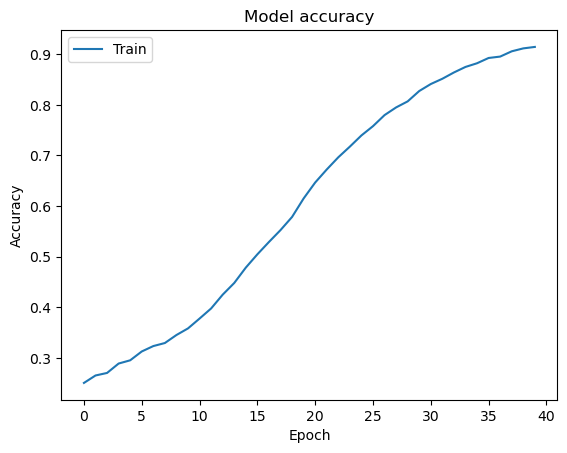

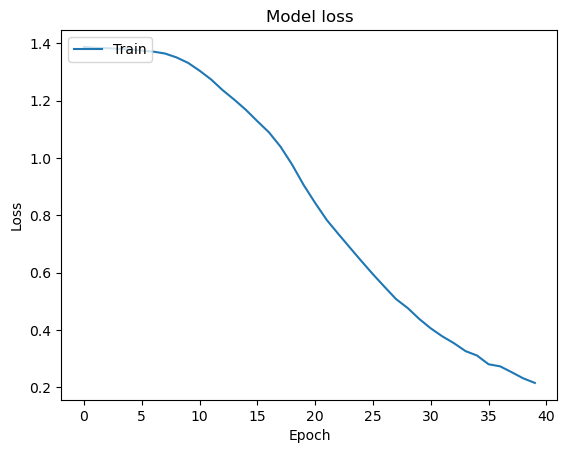

In [15]:
plt.plot(history.history['accuracy']) # For Model Accuracy
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss']) # For Model Loss
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

After running the model for 4+ hours, I achieved accuracy of 89.1% using my full computational power. However, it indicates that with more training time accuracy could have been improved. If I would have trained the model for Epoch=50, 6 or more hours, I would likely have higher accuracy.

This highlights that computational power in image processing is key.

From above project, conclusion has been made that with help of Convolutional Neural Network (CNN) model, we can accurately classifying different types of blood cells based on images(EOSINOPHIL, LYMPHOCYTE, MONOCYTE, NEUTROPHIL). However, it is important to have a high computational power to achieve quicker and more desired results. This application has potential in medical fields where identifying blood cell types is essential to suggest medications and treatments. With help of CNN models, healthcare professionals can automate and streamline the process of analysing blood cell images leading faster diagnosis.